# Lasso Notebook

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings('ignore')


housing = pd.read_csv('housing_neigh.csv', index_col=0)
housing.shape

(2413, 137)

In [178]:
housetarg = pd.Series(housing.SalePrice_Log, name='target')
housefeature = housing.drop('SalePrice_Log',axis=1)

In [179]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(housefeature, housetarg)
Xtrain.shape, Xtest.shape

((1809, 136), (604, 136))

In [180]:
import numpy as np
alphas = np.linspace(0.00001,.0001,100)

### Lasso Gridsearch CV

In [181]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#randomized is faster
from sklearn.linear_model import Lasso

In [182]:
lasso = Lasso(normalize=True)

In [183]:
grid = GridSearchCV(estimator=lasso, param_grid={'alpha':alphas}, cv=10, return_train_score=True)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([1.00000000e-05, 1.09090909e-05, 1.18181818e-05, 1.27272727e-05,
       1.36363636e-05, 1.45454545e-05, 1.54545455e-05, 1.63636364e-05,
       1.72727273e-05, 1.81818182e-05, 1.90909091e-05, 2.00000000e-05,
       2.09090909e-05, 2.18181818e-05, 2.27272727e-05, 2.36363636e-05,
       2.45454545e-05, 2.54545455e-05, 2....
       7.90909091e-05, 8.00000000e-05, 8.09090909e-05, 8.18181818e-05,
       8.27272727e-05, 8.36363636e-05, 8.45454545e-05, 8.54545455e-05,
       8.63636364e-05, 8.72727273e-05, 8.81818182e-05, 8.90909091e-05,
       9.00000000e-05, 9.09090909e-05, 9.18181818e-05, 9.27272727e-05,
       9.36363636e-05, 9.45454545e-05, 9.54545455e-05, 9.63636364e-05,
       9.72727273e-05, 9.81818182e-05, 9.90909091e-05, 1.00000000e-04])},
             return_train_score=True)

In [184]:
grid.score(Xtest,ytest)

0.9386733275959402

In [185]:
best_model = grid.best_estimator_
best_model.score(Xtest, ytest)

0.9386733275959402

In [186]:
print(grid.best_score_)
print(grid.best_params_)

0.9364631133010995
{'alpha': 2.7272727272727276e-05}


In [187]:
#print(grid.cv_results_.keys())
#print(grid.cv_results_)

In [188]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011809,0.002368,0.003063,0.000630,1e-05,{'alpha': 1e-05},0.941247,0.934020,0.942042,0.945140,0.950444,0.929089,0.933974,0.932701,0.920583,0.927502,0.935674,0.008554,48,0.948183,0.949209,0.947911,0.947508,0.947432,0.949377,0.948638,0.949357,0.950053,0.948847,0.948652,0.000831
1,0.010207,0.001074,0.002355,0.000272,1.09091e-05,{'alpha': 1.090909090909091e-05},0.941313,0.934151,0.942090,0.945200,0.950494,0.929195,0.933977,0.932778,0.920675,0.927552,0.935742,0.008543,45,0.948121,0.949142,0.947851,0.947450,0.947375,0.949317,0.948590,0.949298,0.949997,0.948792,0.948593,0.000830
2,0.010383,0.000829,0.002601,0.000289,1.18182e-05,{'alpha': 1.1818181818181819e-05},0.941370,0.934275,0.942146,0.945253,0.950542,0.929298,0.933968,0.932846,0.920746,0.927595,0.935804,0.008536,43,0.948054,0.949069,0.947788,0.947389,0.947317,0.949251,0.948538,0.949236,0.949946,0.948733,0.948532,0.000831
3,0.010770,0.000886,0.002510,0.000255,1.27273e-05,{'alpha': 1.2727272727272728e-05},0.941420,0.934383,0.942262,0.945294,0.950585,0.929382,0.933953,0.932904,0.920810,0.927627,0.935862,0.008535,40,0.947982,0.948997,0.947729,0.947328,0.947253,0.949182,0.948481,0.949173,0.949894,0.948670,0.948469,0.000832
4,0.010566,0.001017,0.002337,0.000191,1.36364e-05,{'alpha': 1.3636363636363638e-05},0.941446,0.934537,0.942401,0.945321,0.950620,0.929465,0.933938,0.932964,0.920859,0.927716,0.935927,0.008529,37,0.947914,0.948932,0.947672,0.947264,0.947187,0.949111,0.948421,0.949109,0.949838,0.948611,0.948406,0.000833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.007646,0.000491,0.002556,0.000524,9.63636e-05,{'alpha': 9.636363636363637e-05},0.937401,0.936226,0.943619,0.943114,0.949453,0.927434,0.927621,0.930259,0.917497,0.924233,0.933686,0.009463,96,0.940589,0.941867,0.940528,0.940334,0.940289,0.942393,0.941980,0.942217,0.943237,0.941838,0.941527,0.000970
96,0.007660,0.000535,0.002322,0.000538,9.72727e-05,{'alpha': 9.727272727272728e-05},0.937301,0.936212,0.943608,0.943087,0.949440,0.927396,0.927570,0.930215,0.917454,0.924170,0.933645,0.009474,97,0.940513,0.941778,0.940443,0.940254,0.940213,0.942309,0.941905,0.942128,0.943155,0.941757,0.941445,0.000968
97,0.008610,0.001160,0.002445,0.000366,9.81818e-05,{'alpha': 9.818181818181818e-05},0.937198,0.936196,0.943592,0.943060,0.949426,0.927355,0.927517,0.930170,0.917411,0.924107,0.933603,0.009484,98,0.940436,0.941690,0.940360,0.940173,0.940136,0.942225,0.941830,0.942039,0.943074,0.941674,0.941364,0.000966
98,0.007819,0.000576,0.002369,0.000254,9.90909e-05,{'alpha': 9.90909090909091e-05},0.937094,0.936180,0.943574,0.943032,0.949413,0.927313,0.927462,0.930124,0.917369,0.924042,0.933560,0.009494,99,0.940360,0.941602,0.940282,0.940092,0.940062,0.942141,0.941754,0.941948,0.942993,0.941591,0.941283,0.000964


In [190]:
cv_results.sort_values('mean_test_score', ascending=False).head(5)
# look for the best test set performance

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
19,0.009287,0.000688,0.002486,0.000410,2.72727e-05,{'alpha': 2.7272727272727276e-05},0.942214,0.936050,0.943900,0.945037,0.951098,0.930140,0.933180,0.933169,0.921313,0.928530,0.936463,0.008546,1,0.947042,0.947911,0.946755,0.946151,0.946250,0.948108,0.947521,0.948175,0.948970,0.947573,0.947446,0.000853
18,0.009077,0.000454,0.002258,0.000199,2.63636e-05,{'alpha': 2.6363636363636365e-05},0.942183,0.935971,0.943815,0.945101,0.951098,0.930132,0.933271,0.933172,0.921316,0.928533,0.936459,0.008539,2,0.947103,0.947979,0.946821,0.946212,0.946313,0.948176,0.947582,0.948237,0.949030,0.947637,0.947509,0.000853
20,0.009313,0.000801,0.002304,0.000358,2.81818e-05,{'alpha': 2.818181818181818e-05},0.942243,0.936119,0.943974,0.944975,0.951097,0.930117,0.933082,0.933160,0.921313,0.928511,0.936459,0.008555,3,0.946978,0.947843,0.946690,0.946089,0.946187,0.948044,0.947459,0.948113,0.948911,0.947515,0.947383,0.000854
21,0.008911,0.000258,0.002242,0.000241,2.90909e-05,{'alpha': 2.9090909090909093e-05},0.942272,0.936154,0.944033,0.944921,0.951097,0.930092,0.932980,0.933151,0.921307,0.928485,0.936449,0.008567,4,0.946913,0.947778,0.946627,0.946025,0.946122,0.947978,0.947395,0.948050,0.948851,0.947455,0.947319,0.000854
17,0.009224,0.000531,0.002423,0.000287,2.54545e-05,{'alpha': 2.5454545454545454e-05},0.942149,0.935893,0.943725,0.945166,0.951096,0.930103,0.933358,0.933178,0.921315,0.928508,0.936449,0.008537,5,0.947163,0.948047,0.946885,0.946274,0.946373,0.948246,0.947641,0.948303,0.949090,0.947714,0.947573,0.000855


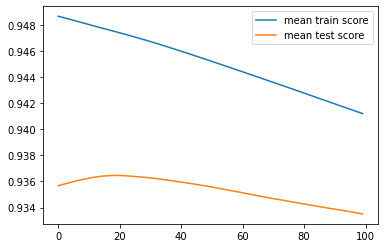

In [191]:
cv_results['mean_train_score'].plot(label='mean train score')
cv_results['mean_test_score'].plot(label='mean test score')
plt.legend(loc=1)

### Lasso model (user provides alpha)

In [201]:
lasso2 = Lasso(alpha=2.72727e-05, normalize=True)
lasso2.get_params()

{'alpha': 2.72727e-05,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [202]:
lasso2.fit(Xtrain,ytrain)

Lasso(alpha=2.72727e-05, normalize=True)

In [203]:
print('Train score: ', lasso2.score(Xtrain,ytrain))
print('Test score: ', lasso2.score(Xtest,ytest))

Train score:  0.9468465951027093
Test score:  0.9386733289753716


In [204]:
lasso2.score(Xtest,ytest)

0.9386733289753716

In [205]:
print('the intercept is: %.2f' %(lasso2.intercept_))
coefs = pd.Series(lasso2.coef_, index=housefeature.columns)

the intercept is: 2.59


In [206]:
coefs.sort_values(ascending=False).head(30)

GrLivArea_Log           0.404205
Exterior1st__PreCast    0.318719
Utilities               0.150549
Exterior1st__BrkComm    0.084456
LotArea_Log             0.082512
Exterior1st__BrkFace    0.066108
OverallQual             0.056340
HouseStyle__1.5Unf      0.046301
MSZoning__FV            0.042343
MSSubClass__75          0.041966
GarageCars              0.041196
OverallCond             0.038564
HouseStyle__SFoyer      0.035083
Fireplaces              0.030252
MSSubClass__120         0.029909
CentralAir              0.024534
KitchenQual             0.023700
Foundation__Slab        0.022948
Exterior1st__Stucco     0.020705
Street_Paved            0.020473
Condition1__PosN        0.018421
Foundation__PConc       0.016506
MSSubClass__70          0.013162
PavedDrive              0.010517
GarageFinish__Fin       0.008518
Exterior1st__MetalSd    0.008354
BsmtExposure            0.007718
GarageType__BuiltIn     0.007478
HeatingQC               0.007420
ExterQual               0.006265
dtype: flo

### Calculate RMSE

In [207]:
mse = np.mean((lasso2.predict(Xtest)-ytest)**2)
mse

0.008742753835669631

In [208]:
RMSE = np.sqrt(mse)
RMSE

0.0935026942695751

### Using `cross_val_score`

In [209]:
import sklearn.model_selection as ms
scores = ms.cross_val_score(estimator=lasso2, X=Xtrain, y=ytrain, cv=5)
scores = pd.Series(scores)

In [210]:
print(scores.round(3))
print('-'*40)
print('Score Mean %.3f' %(scores.mean()))
print('Score std deviation: %.3f' %(scores.std()))

0    0.937
1    0.945
2    0.940
3    0.933
4    0.925
dtype: float64
----------------------------------------
Score Mean 0.936
Score std deviation: 0.008
